In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import scipy.ndimage as ndimage

In [4]:
#Image reading in grey level / float64 conversion
img=np.float32(cv2.imread('barbara.jpg',cv2.IMREAD_GRAYSCALE))
(h,w) = img.shape
print("Dimensions of the image :",h,"rows x",w,"columns")
print("Type of the image :",img.dtype)


Dimensions of the image : 512 rows x 512 columns
Type of the image : float32


## Gradient Filter

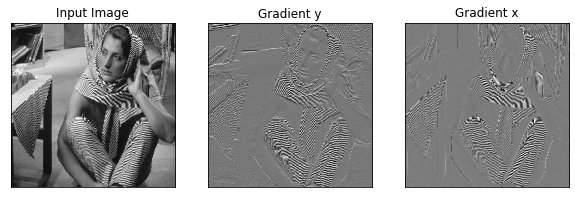

In [5]:
# image gradient among the y axis
img_gradient_y= np.zeros((h-1,w))
for i in range(1,h):
    img_gradient_y[i-1] = img[i] - img[i-1]

# image gradient among the x axis
img_gradient_x= np.zeros((h,w-1))
for j in range(1,w):
    img_gradient_x[:,j-1] = img[:,j] - img[:,j-1]
    
    
#Image display in grey level
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_gradient_y, cmap = 'gray')
plt.title('Gradient y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_gradient_x,cmap = 'gray')
plt.title("Gradient x"), plt.xticks([]), plt.yticks([])
plt.show()


## Sobel Filter

In [6]:
kernelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

sobel_x = signal.convolve(img,kernelx)
for i in range(len(sobel_x )):
    for j in range(len(sobel_x[0])):
        sobel_x[i,j] = min(max(sobel_x[i,j],0),255)

sobel_y = signal.convolve(img,kernely)
for i in range(len(sobel_y )):
    for j in range(len(sobel_y[0])):
        sobel_y[i,j] = min(max(sobel_y[i,j],0),255)


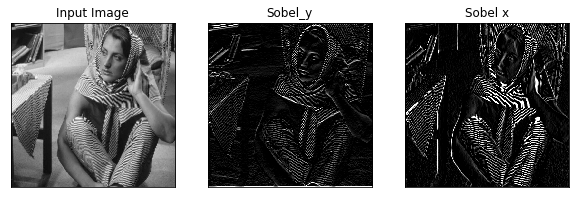

In [7]:
#Image display in grey level
plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobel_y, cmap = 'gray')
plt.title('Sobel_y'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_x,cmap = 'gray')
plt.title("Sobel x"), plt.xticks([]), plt.yticks([])
plt.show()


## Averaging filter

In [8]:
img_to_average = np.zeros((h+2,w+2))
image_averaging= np.zeros((h+2,w+2))
img_to_average[1:h+1,1:w+1] = img
image_averaging[1:h+1,0]= img[:,0]
image_averaging[1:h+1,w]= img[:,w-1]
image_averaging[0,1:w+1]= img[0,:]
image_averaging[h,1:w+1]= img[h-1,:]
image_averaging[h+1,w+1] = img[h-1,w-1]
image_averaging[0,0] = img[0,0]
image_averaging[0,w+1] = img[0,w-1]
image_averaging[h+1,0] = img[h-1,0]

for i in range(h):
    for j in range(w):
        image_averaging[i,j] = (img_to_average[i-1,j-1] + img_to_average[i-1,j] + img_to_average[i-1,j+1] + img_to_average[i,j] + img_to_average[i,j-1] + img_to_average[i+1,j-1] + img_to_average[i,j+1] + img_to_average[i+1,j+1] + img_to_average[i+1,j])/9  



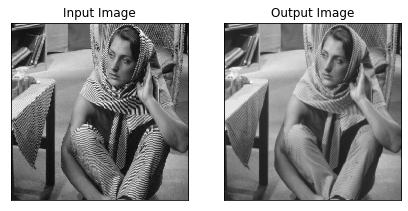

In [9]:
plt.figure(figsize=(7,7))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_averaging, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Gaussien filter

In [10]:
# makes a convolution using a gaussian kernel to blur the image
kernel = np.outer(signal.gaussian(10, 2), signal.gaussian(10, 2))
blurred_image = signal.fftconvolve(img, kernel, mode="same")

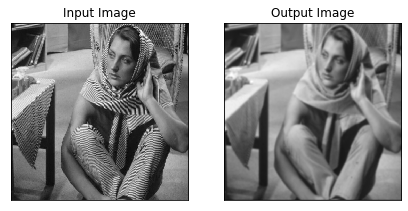

In [11]:
#Image display in grey level
plt.figure(figsize=(7,7))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_image, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()
